In [76]:
import pandas as pd

In [77]:
pip install sparknlp


In [78]:
pip install pyspark

In [79]:
import sparknlp
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.functions import udf
from pyspark.sql.types import *
spark = SparkSession \
    .builder \
    .appName("assignment 4") \
    .config("spark.executor.allowSparkContext", True) \
    .getOrCreate()
sc = spark.sparkContext



In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
path= "/content/drive/MyDrive/dataset.csv"

In [82]:
df = spark.read.load(path, format="csv", header=True, inferSchema=True)

In [83]:
df.show()

+---------+----------+------+--------+----------+
|  country|      date|sector|   value| timestamp|
+---------+----------+------+--------+----------+
|   Brazil|01/01/2019| Power|0.096799|1546300800|
|    China|01/01/2019| Power| 14.8161|1546300800|
|EU27 & UK|01/01/2019| Power| 1.88649|1546300800|
|   France|01/01/2019| Power|0.051217|1546300800|
|  Germany|01/01/2019| Power|0.315002|1546300800|
|    India|01/01/2019| Power| 3.34922|1546300800|
|    Italy|01/01/2019| Power|0.168149|1546300800|
|    Japan|01/01/2019| Power|  1.2958|1546300800|
|      ROW|01/01/2019| Power| 8.57127|1546300800|
|   Russia|01/01/2019| Power| 2.84668|1546300800|
|    Spain|01/01/2019| Power|0.130501|1546300800|
|       UK|01/01/2019| Power|0.186637|1546300800|
|       US|01/01/2019| Power| 3.97085|1546300800|
|    WORLD|01/01/2019| Power| 36.8332|1546300800|
|   Brazil|02/01/2019| Power|0.116758|1546387200|
|    China|02/01/2019| Power| 14.5771|1546387200|
|EU27 & UK|02/01/2019| Power| 2.83332|1546387200|


In [84]:
df.printSchema()


root
 |-- country: string (nullable = true)
 |-- date: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- value: double (nullable = true)
 |-- timestamp: integer (nullable = true)



In [85]:
df.describe().show()


+-------+-------+----------+-----------------+------------------+-------------------+
|summary|country|      date|           sector|             value|          timestamp|
+-------+-------+----------+-----------------+------------------+-------------------+
|  count| 135408|    135408|           135408|            135408|             135408|
|   mean|   NULL|      NULL|             NULL|2.3594388119354575|         1.615896E9|
| stddev|   NULL|      NULL|             NULL| 5.908582193364269|4.020588971201717E7|
|    min| Brazil|01/01/2019|Domestic Aviation|        7.77636E-5|         1546300800|
|    max|  WORLD|31/12/2022|      Residential|           46.2635|         1685491200|
+-------+-------+----------+-----------------+------------------+-------------------+



In [86]:
from pyspark.sql.functions import from_unixtime, to_utc_timestamp
df = df.withColumn("datetime", from_unixtime("timestamp"))
df = df.withColumn("datetime_utc", to_utc_timestamp("datetime", "UTC"))

df.show()

+---------+----------+------+--------+----------+-------------------+-------------------+
|  country|      date|sector|   value| timestamp|           datetime|       datetime_utc|
+---------+----------+------+--------+----------+-------------------+-------------------+
|   Brazil|01/01/2019| Power|0.096799|1546300800|2019-01-01 00:00:00|2019-01-01 00:00:00|
|    China|01/01/2019| Power| 14.8161|1546300800|2019-01-01 00:00:00|2019-01-01 00:00:00|
|EU27 & UK|01/01/2019| Power| 1.88649|1546300800|2019-01-01 00:00:00|2019-01-01 00:00:00|
|   France|01/01/2019| Power|0.051217|1546300800|2019-01-01 00:00:00|2019-01-01 00:00:00|
|  Germany|01/01/2019| Power|0.315002|1546300800|2019-01-01 00:00:00|2019-01-01 00:00:00|
|    India|01/01/2019| Power| 3.34922|1546300800|2019-01-01 00:00:00|2019-01-01 00:00:00|
|    Italy|01/01/2019| Power|0.168149|1546300800|2019-01-01 00:00:00|2019-01-01 00:00:00|
|    Japan|01/01/2019| Power|  1.2958|1546300800|2019-01-01 00:00:00|2019-01-01 00:00:00|
|      ROW

In [87]:
df.describe().show()

+-------+-------+----------+-----------------+------------------+-------------------+-------------------+
|summary|country|      date|           sector|             value|          timestamp|           datetime|
+-------+-------+----------+-----------------+------------------+-------------------+-------------------+
|  count| 135408|    135408|           135408|            135408|             135408|             135408|
|   mean|   NULL|      NULL|             NULL|2.3594388119354575|         1.615896E9|               NULL|
| stddev|   NULL|      NULL|             NULL| 5.908582193364269|4.020588971201717E7|               NULL|
|    min| Brazil|01/01/2019|Domestic Aviation|        7.77636E-5|         1546300800|2019-01-01 00:00:00|
|    max|  WORLD|31/12/2022|      Residential|           46.2635|         1685491200|2023-05-31 00:00:00|
+-------+-------+----------+-----------------+------------------+-------------------+-------------------+



In [88]:
pdf_df = df.toPandas()

In [89]:
pdf_df.describe(include=['O']) # summary of non-numeric values

,country,date,sector,datetime
count,135408,135408,135408,135408
unique,14,1612,6,1612
top,Brazil,01/01/2019,Power,2019-01-01 00:00:00
freq,9672,84,22568,84


In [90]:
pdf_df['value'].describe() #sumary of numeric value (value)

count    135408.000000
mean          2.359439
std           5.908582
min           0.000078
25%           0.078661
50%           0.314597
75%           1.636632
max          46.263500
Name: value, dtype: float64

In [91]:
pdf_df.nunique()

country             14
date              1612
sector               6
value           127135
timestamp         1612
datetime          1612
datetime_utc      1612
dtype: int64

In [92]:
pdf_df.isnull().sum()

country         0
date            0
sector          0
value           0
timestamp       0
datetime        0
datetime_utc    0
dtype: int64

In [93]:
from pyspark.sql.functions import stddev, mean, col,when

In [94]:
grouped_df = df.groupBy("country", "sector")

aggregated_df = grouped_df.agg(mean("value").alias("MeanEmissions"), stddev("value").alias("StdDevEmissions"))

threshold = 3
df_with_alias = df.withColumnRenamed("country", "country1").withColumnRenamed("sector", "sector1")
aggdf_with_alias = aggregated_df.withColumnRenamed("country", "country2").withColumnRenamed("sector", "sector2")

joined_df = df_with_alias.join(aggdf_with_alias, ((df_with_alias["country1"] == aggdf_with_alias ["country2"]) &
                                    (df_with_alias["sector1"] == aggdf_with_alias ["sector2"])), "left")

outlier_df = joined_df.withColumn("IsOutlier", when(
    (col("value") > col("MeanEmissions") + threshold * col("StdDevEmissions")) |
    (col("value") < col("MeanEmissions") - threshold * col("StdDevEmissions")),
    True).otherwise(False))


outlier_df.filter(col("IsOutlier") == True).count()

725

In [95]:
outlier_df.show()

+---------+----------+-------+--------+----------+-------------------+-------------------+---------+-------+-------------------+--------------------+---------+
| country1|      date|sector1|   value| timestamp|           datetime|       datetime_utc| country2|sector2|      MeanEmissions|     StdDevEmissions|IsOutlier|
+---------+----------+-------+--------+----------+-------------------+-------------------+---------+-------+-------------------+--------------------+---------+
|   Brazil|01/01/2019|  Power|0.096799|1546300800|2019-01-01 00:00:00|2019-01-01 00:00:00|   Brazil|  Power| 0.2075725155086851| 0.11156862179075987|    false|
|    China|01/01/2019|  Power| 14.8161|1546300800|2019-01-01 00:00:00|2019-01-01 00:00:00|    China|  Power| 13.368498802729526|  2.0111248290030757|    false|
|EU27 & UK|01/01/2019|  Power| 1.88649|1546300800|2019-01-01 00:00:00|2019-01-01 00:00:00|EU27 & UK|  Power| 2.4009977853598006|   0.597816817199883|    false|
|   France|01/01/2019|  Power|0.051217|1

In [96]:
newdf=outlier_df.filter(col("IsOutlier") == False).select('country1','datetime','sector1','value').withColumnRenamed("country1", "country").withColumnRenamed("sector1", "sector")

In [97]:
newdf.show()

+---------+-------------------+------+--------+
|  country|           datetime|sector|   value|
+---------+-------------------+------+--------+
|   Brazil|2019-01-01 00:00:00| Power|0.096799|
|    China|2019-01-01 00:00:00| Power| 14.8161|
|EU27 & UK|2019-01-01 00:00:00| Power| 1.88649|
|   France|2019-01-01 00:00:00| Power|0.051217|
|  Germany|2019-01-01 00:00:00| Power|0.315002|
|    India|2019-01-01 00:00:00| Power| 3.34922|
|    Italy|2019-01-01 00:00:00| Power|0.168149|
|    Japan|2019-01-01 00:00:00| Power|  1.2958|
|      ROW|2019-01-01 00:00:00| Power| 8.57127|
|   Russia|2019-01-01 00:00:00| Power| 2.84668|
|    Spain|2019-01-01 00:00:00| Power|0.130501|
|       UK|2019-01-01 00:00:00| Power|0.186637|
|       US|2019-01-01 00:00:00| Power| 3.97085|
|    WORLD|2019-01-01 00:00:00| Power| 36.8332|
|   Brazil|2019-01-02 00:00:00| Power|0.116758|
|    China|2019-01-02 00:00:00| Power| 14.5771|
|EU27 & UK|2019-01-02 00:00:00| Power| 2.83332|
|   France|2019-01-02 00:00:00| Power|0.

In [98]:
pd_newdf = newdf.toPandas()

In [99]:
# Create dummy variables for the 'Country' and 'Sector' columns
df_dummies = pd.get_dummies(pd_newdf, columns=['country', 'sector'])

print(df_dummies )

                   datetime      value  country_Brazil  country_China  \
0       2019-01-01 00:00:00   0.096799               1              0   
1       2019-01-01 00:00:00  14.816100               0              1   
2       2019-01-01 00:00:00   1.886490               0              0   
3       2019-01-01 00:00:00   0.051217               0              0   
4       2019-01-01 00:00:00   0.315002               0              0   
...                     ...        ...             ...            ...   
134678  2023-05-31 00:00:00   0.016524               0              0   
134679  2023-05-31 00:00:00   0.068408               0              0   
134680  2023-05-31 00:00:00   0.103774               0              0   
134681  2023-05-31 00:00:00   0.200409               0              0   
134682  2023-05-31 00:00:00   1.558450               0              0   

        country_EU27 & UK  country_France  country_Germany  country_India  \
0                       0               0     

In [100]:
df_dummies = pd.concat([pd_newdf, pd.get_dummies(pd_newdf['country'], prefix='country'),pd.get_dummies(pd_newdf['sector'], prefix='sector')], axis=1)

print(df_dummies)

          country             datetime                  sector      value  \
0          Brazil  2019-01-01 00:00:00                   Power   0.096799   
1           China  2019-01-01 00:00:00                   Power  14.816100   
2       EU27 & UK  2019-01-01 00:00:00                   Power   1.886490   
3          France  2019-01-01 00:00:00                   Power   0.051217   
4         Germany  2019-01-01 00:00:00                   Power   0.315002   
...           ...                  ...                     ...        ...   
134678     Russia  2023-05-31 00:00:00  International Aviation   0.016524   
134679      Spain  2023-05-31 00:00:00  International Aviation   0.068408   
134680         UK  2023-05-31 00:00:00  International Aviation   0.103774   
134681         US  2023-05-31 00:00:00  International Aviation   0.200409   
134682      WORLD  2023-05-31 00:00:00  International Aviation   1.558450   

        country_Brazil  country_China  country_EU27 & UK  country_France  \

In [101]:
df_dummies['datetime'] = pd.to_datetime(df_dummies['datetime'], errors='coerce')

In [102]:
# Extract Year
df_dummies['Year'] = df_dummies['datetime'].dt.year

# Extract Quarter
df_dummies['Quarter'] = df_dummies['datetime'].dt.quarter

# Extract Month
df_dummies['Month'] = df_dummies['datetime'].dt.month

# Extract Day
df_dummies['Day'] = df_dummies['datetime'].dt.day

print(df_dummies)





          country   datetime                  sector      value  \
0          Brazil 2019-01-01                   Power   0.096799   
1           China 2019-01-01                   Power  14.816100   
2       EU27 & UK 2019-01-01                   Power   1.886490   
3          France 2019-01-01                   Power   0.051217   
4         Germany 2019-01-01                   Power   0.315002   
...           ...        ...                     ...        ...   
134678     Russia 2023-05-31  International Aviation   0.016524   
134679      Spain 2023-05-31  International Aviation   0.068408   
134680         UK 2023-05-31  International Aviation   0.103774   
134681         US 2023-05-31  International Aviation   0.200409   
134682      WORLD 2023-05-31  International Aviation   1.558450   

        country_Brazil  country_China  country_EU27 & UK  country_France  \
0                    1              0                  0               0   
1                    0              1      

In [103]:
# Create dummy variables for the 'Gender' and 'Occupation' columns
df_dummies = pd.get_dummies(df_dummies, columns=['Year','Quarter', 'Month'])

print(df_dummies)

          country   datetime                  sector      value  \
0          Brazil 2019-01-01                   Power   0.096799   
1           China 2019-01-01                   Power  14.816100   
2       EU27 & UK 2019-01-01                   Power   1.886490   
3          France 2019-01-01                   Power   0.051217   
4         Germany 2019-01-01                   Power   0.315002   
...           ...        ...                     ...        ...   
134678     Russia 2023-05-31  International Aviation   0.016524   
134679      Spain 2023-05-31  International Aviation   0.068408   
134680         UK 2023-05-31  International Aviation   0.103774   
134681         US 2023-05-31  International Aviation   0.200409   
134682      WORLD 2023-05-31  International Aviation   1.558450   

        country_Brazil  country_China  country_EU27 & UK  country_France  \
0                    1              0                  0               0   
1                    0              1      

In [104]:
correlation_matrix = df_dummies.corr().abs()
#print(correlation_matrix['value'].sort_values(ascending=False))

<ipython-input-104-daf6ba6ac866>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_dummies.corr().abs()


In [105]:
correlation_matrix

,value,country_Brazil,country_China,country_EU27 & UK,country_France,country_Germany,country_India,country_Italy,country_Japan,country_ROW,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
value,1.000000,0.101728,0.122238,0.042944,0.104330,0.096520,0.056487,0.103968,0.087891,0.114188,...,0.002684,0.005475,0.010118,0.005394,0.004433,0.003879,0.003552,0.005241,0.004290,0.013415
country_Brazil,0.101728,1.000000,0.076732,0.076999,0.076917,0.076968,0.076486,0.076994,0.076956,0.076870,...,0.000439,0.000785,0.000348,0.000221,0.000438,0.000260,0.000362,0.000553,0.000111,0.000045
country_China,0.122238,0.076732,1.000000,0.076921,0.076839,0.076891,0.076409,0.076917,0.076878,0.076792,...,0.000021,0.001450,0.001402,0.000366,0.000361,0.000323,0.000335,0.000353,0.000366,0.000647
country_EU27 & UK,0.042944,0.076999,0.076921,1.000000,0.077106,0.077158,0.076674,0.077184,0.077145,0.077059,...,0.000463,0.000679,0.000426,0.000142,0.000156,0.000195,0.000174,0.000164,0.000252,0.000022
country_France,0.104330,0.076917,0.076839,0.077106,1.000000,0.077076,0.076593,0.077102,0.077063,0.076977,...,0.000579,0.000343,0.000310,0.000013,0.000002,0.000037,0.000018,0.000006,0.000535,0.000288
country_Germany,0.096520,0.076968,0.076891,0.077158,0.077076,1.000000,0.076644,0.077154,0.077115,0.077029,...,0.000007,0.000743,0.000785,0.000085,0.000098,0.000137,0.000117,0.000106,0.000085,0.000568
country_India,0.056487,0.076486,0.076409,0.076674,0.076593,0.076644,1.000000,0.076670,0.076632,0.076546,...,0.000030,0.002931,0.000817,0.000726,0.000840,0.000801,0.000805,0.000723,0.000836,0.000613
country_Italy,0.103968,0.076994,0.076917,0.077184,0.077102,0.077154,0.076670,1.000000,0.077141,0.077055,...,0.000063,0.000489,0.000435,0.000134,0.000148,0.000294,0.000166,0.000156,0.000134,0.000186
country_Japan,0.087891,0.076956,0.076878,0.077145,0.077063,0.077115,0.076632,0.077141,1.000000,0.077016,...,0.000119,0.000671,0.000029,0.000061,0.000073,0.000435,0.000201,0.000404,0.000061,0.000105
country_ROW,0.114188,0.076870,0.076792,0.077059,0.076977,0.077029,0.076546,0.077055,0.077016,1.000000,...,0.000209,0.000841,0.001156,0.000006,0.000094,0.000055,0.000072,0.000086,0.000103,0.000380


In [185]:
print(correlation_matrix['value'].sort_values(ascending=False))


value                            1.000000
country_WORLD                    0.646069
sector_Power                     0.235046
sector_Domestic Aviation         0.169182
sector_International Aviation    0.164821
sector_Industry                  0.147292
country_China                    0.122238
country_ROW                      0.114188
country_Spain                    0.105633
country_France                   0.104330
country_Italy                    0.103968
country_UK                       0.103007
country_Brazil                   0.101728
country_Germany                  0.096520
country_Japan                    0.087891
country_Russia                   0.072581
sector_Residential               0.065953
country_India                    0.056487
country_EU27 & UK                0.042944
sector_Ground Transport          0.017856
Month_1                          0.013731
Quarter_2                        0.013583
Month_12                         0.013415
Quarter_1                        0

In [106]:
df_dummies['China_Power'] = df_dummies['country_China']*df_dummies['sector_Power']
df_dummies['ROW_Power'] = df_dummies['country_ROW']*df_dummies['sector_Power']
df_dummies['China_Industry'] = df_dummies['country_China']*df_dummies['sector_Power']
df_dummies['ROW_Power'] = df_dummies['country_ROW']*df_dummies['sector_Power']
df_dummies['sector_Domestic_Aviation'] = df_dummies['sector_Domestic Aviation']

In [107]:
features = [
    'country_WORLD', 'sector_Power', 'sector_Domestic_Aviation',
    'sector_International Aviation', 'sector_Industry',
    'country_China', 'country_ROW', 'country_Spain', 'country_France',
    'country_Italy', 'country_UK', 'country_Brazil','China_Power','China_Industry','ROW_Power','value'

    ]

In [108]:
df_tosp = df_dummies[features]

In [109]:
df_tosp.columns

Index(['country_WORLD', 'sector_Power', 'sector_Domestic_Aviation',
       'sector_International Aviation', 'sector_Industry', 'country_China',
       'country_ROW', 'country_Spain', 'country_France', 'country_Italy',
       'country_UK', 'country_Brazil', 'China_Power', 'China_Industry',
       'ROW_Power', 'value'],
      dtype='object')

In [133]:
spark_df = spark.createDataFrame(df_tosp)

In [134]:
spark_df.printSchema()

root
 |-- country_WORLD: long (nullable = true)
 |-- sector_Power: long (nullable = true)
 |-- sector_Domestic_Aviation: long (nullable = true)
 |-- sector_International Aviation: long (nullable = true)
 |-- sector_Industry: long (nullable = true)
 |-- country_China: long (nullable = true)
 |-- country_ROW: long (nullable = true)
 |-- country_Spain: long (nullable = true)
 |-- country_France: long (nullable = true)
 |-- country_Italy: long (nullable = true)
 |-- country_UK: long (nullable = true)
 |-- country_Brazil: long (nullable = true)
 |-- China_Power: long (nullable = true)
 |-- China_Industry: long (nullable = true)
 |-- ROW_Power: long (nullable = true)
 |-- value: double (nullable = true)



In [152]:
from pyspark.ml.regression import DecisionTreeRegressor, RandomForestRegressor, LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

In [153]:
feature_columns = ['country_WORLD', 'sector_Power', 'sector_Domestic_Aviation',
       'sector_International Aviation', 'sector_Industry', 'country_China',
       'country_ROW', 'country_Spain', 'country_France', 'country_Italy',
       'country_UK', 'country_Brazil', 'China_Power', 'China_Industry',
       'ROW_Power']  # Assuming the last column is the target column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(spark_df)


In [154]:
data

DataFrame[country_WORLD: bigint, sector_Power: bigint, sector_Domestic_Aviation: bigint, sector_International Aviation: bigint, sector_Industry: bigint, country_China: bigint, country_ROW: bigint, country_Spain: bigint, country_France: bigint, country_Italy: bigint, country_UK: bigint, country_Brazil: bigint, China_Power: bigint, China_Industry: bigint, ROW_Power: bigint, value: double, features: vector]

In [155]:
from pyspark.ml.regression import DecisionTreeRegressor, RandomForestRegressor, LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

In [156]:
train_data, test_data = data.randomSplit([0.7, 0.3], seed=123)

In [157]:
train_data

DataFrame[country_WORLD: bigint, sector_Power: bigint, sector_Domestic_Aviation: bigint, sector_International Aviation: bigint, sector_Industry: bigint, country_China: bigint, country_ROW: bigint, country_Spain: bigint, country_France: bigint, country_Italy: bigint, country_UK: bigint, country_Brazil: bigint, China_Power: bigint, China_Industry: bigint, ROW_Power: bigint, value: double, features: vector]

In [158]:
dt = DecisionTreeRegressor(featuresCol="features", labelCol="value")
dt_model = dt.fit(train_data)

In [159]:
rf = RandomForestRegressor(featuresCol="features", labelCol="value")
rf_model = rf.fit(train_data)

In [160]:
from pyspark.ml.regression import LinearRegression
svr = LinearRegression(featuresCol="features", labelCol="value", solver="l-bfgs")
svr_model = svr.fit(train_data)

In [161]:
dt_model

DecisionTreeRegressionModel: uid=DecisionTreeRegressor_beaab7f9f796, depth=5, numNodes=25, numFeatures=15

In [162]:
rf_model

RandomForestRegressionModel: uid=RandomForestRegressor_05fb417b6988, numTrees=20, numFeatures=15

In [163]:
svr_model

LinearRegressionModel: uid=LinearRegression_ffda5c37a0cf, numFeatures=15

In [164]:
# Make predictions
dt_predictions = dt_model.transform(test_data)
rf_predictions = rf_model.transform(test_data)
svr_predictions = svr_model.transform(test_data)

# Evaluate the models
evaluator = RegressionEvaluator(labelCol="value", predictionCol="prediction", metricName="rmse")

dt_rmse = evaluator.evaluate(dt_predictions)
rf_rmse = evaluator.evaluate(rf_predictions)
svr_rmse = evaluator.evaluate(svr_predictions)

print("Decision Tree RMSE:", dt_rmse)
print("Random Forest RMSE:", rf_rmse)
print("SVR RMSE:", svr_rmse)


Decision Tree RMSE: 1.4127408016706824
Random Forest RMSE: 2.8749911807894164
SVR RMSE: 3.678191037228738


In [165]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit
from pyspark.ml import Pipeline

In [166]:
pipeline = Pipeline(stages=[assembler, dt_model])

In [172]:
param_grid = (ParamGridBuilder()
              .addGrid(dt_model.maxDepth, [5, 10, 15])
              .addGrid(dt_model.maxBins, [20, 30, 40])
              .addGrid(dt_model.minInstancesPerNode, [1, 5, 10])
              .addGrid(dt.minInfoGain, [0.0, 0.1, 0.2])
              .build())



In [173]:
cross_val = CrossValidator(estimator=pipeline, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=5)
train_data = train_data.drop('features')
# Fit the CrossValidator to the training data
cv_model = cross_val.fit(train_data)



In [174]:
# Get the best model from the CrossValidator
best_model = cv_model.bestModel
test_data = test_data.drop('features')
# Evaluate the best model on the test data
test_predictions = best_model.transform(test_data)
rmse = evaluator.evaluate(test_predictions)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 1.4127408016706824


Time-series analysis

In [175]:
import statsmodels.api as sm

In [176]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.3 MB/s eta 0:00:00


In [177]:
from pmdarima.arima import auto_arima

In [178]:

countries = pdf_df["country"].unique()
sectors = pdf_df["sector"].unique()


results = []

for country in countries:
    for sector in sectors:
        # extract data of certain country and sector
        subset_df = pdf_df[(pdf_df["country"] == country) & (pdf_df["sector"] == sector)]

        time_series = subset_df.set_index("datetime")["value"]

        # ARIMA
        arima_model = sm.tsa.ARIMA(time_series, order=(1, 1, 1)).fit()

        # STL seasonal decomposition
        stl_decomposition = sm.tsa.seasonal_decompose(time_series, model="additive", period=12)

        # save the result
        results.append({
            "Country": country,
            "Sector": sector,
            "ARIMA_Model": arima_model,
            "STL_Decomposition": stl_decomposition
        })

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

In [179]:
results

[{'Country': 'Brazil',
  'Sector': 'Power',
  'ARIMA_Model': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x7fcee364a8c0>,
  'STL_Decomposition': <statsmodels.tsa.seasonal.DecomposeResult at 0x7fcee364b6d0>},
 {'Country': 'Brazil',
  'Sector': 'Industry',
  'ARIMA_Model': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x7fcee364b9a0>,
  'STL_Decomposition': <statsmodels.tsa.seasonal.DecomposeResult at 0x7fced38e5120>},
 {'Country': 'Brazil',
  'Sector': 'Ground Transport',
  'ARIMA_Model': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x7fced38e6b90>,
  'STL_Decomposition': <statsmodels.tsa.seasonal.DecomposeResult at 0x7fced38e6f80>},
 {'Country': 'Brazil',
  'Sector': 'Residential',
  'ARIMA_Model': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x7fced38e52a0>,
  'STL_Decomposition': <statsmodels.tsa.seasonal.DecomposeResult at 0x7fcedb44c910>},
 {'Country': 'Brazil',
  'Sector': 'Domestic Aviation',
  'ARIMA_Model': <statsmodels.tsa.arima.model.ARIMAResultsWr

In [180]:
len(results)

84

In [181]:
results[0]['ARIMA_Model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                 1612
Model:                 ARIMA(1, 1, 1)   Log Likelihood                3879.100
Date:                Tue, 10 Oct 2023   AIC                          -7752.200
Time:                        19:43:56   BIC                          -7736.046
Sample:                    01-01-2019   HQIC                         -7746.203
                         - 05-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5788      0.055    -10.543      0.000      -0.686      -0.471
ma.L1          0.7320      0.045     16.427      0.000       0.645       0.819
sigma2         0.0005   7.71e-06     61.503      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   1.24   Jarque-Bera (JB):              3942.71
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Figure(640x480)


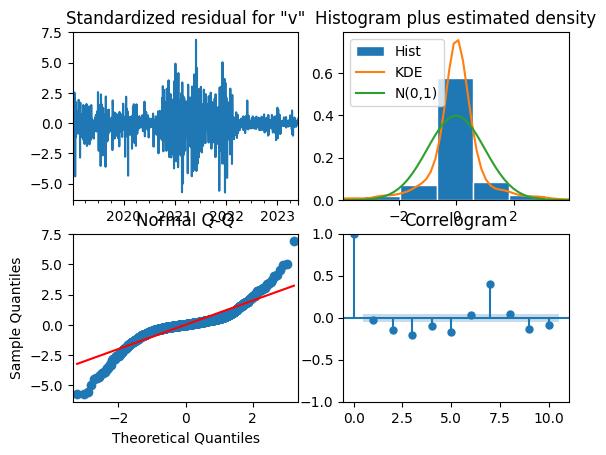

In [182]:
print(results[0]['ARIMA_Model'].plot_diagnostics())

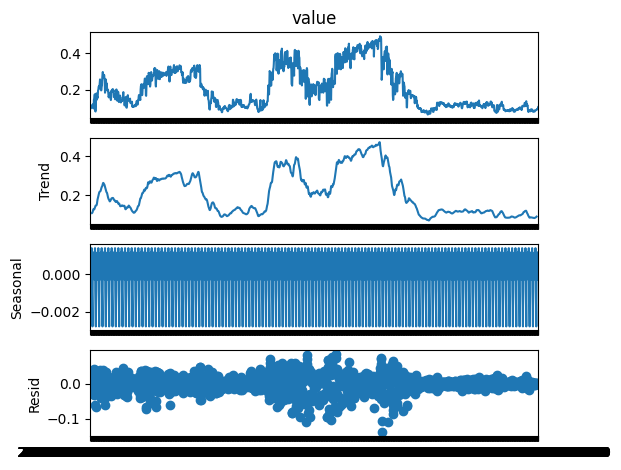

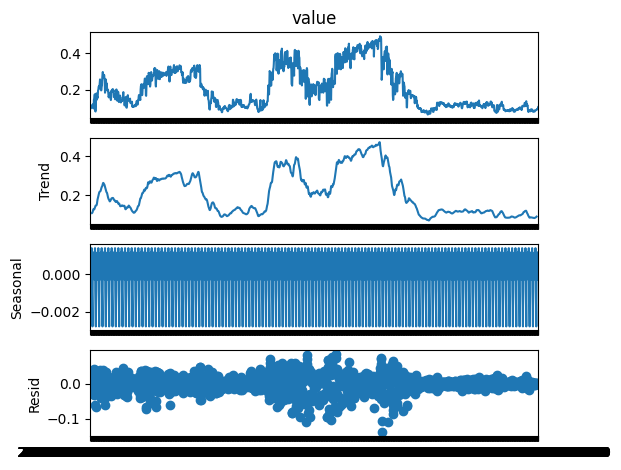

In [183]:
results[0]['STL_Decomposition'].plot()

In [184]:
results[0]['STL_Decomposition'].seasonal


datetime
2019-01-01 00:00:00    0.000604
2019-01-02 00:00:00    0.000604
2019-01-03 00:00:00    0.001161
2019-01-04 00:00:00   -0.000286
2019-01-05 00:00:00    0.000925
                         ...   
2023-05-27 00:00:00   -0.000207
2023-05-28 00:00:00    0.000604
2023-05-29 00:00:00    0.000604
2023-05-30 00:00:00    0.001161
2023-05-31 00:00:00   -0.000286
Name: seasonal, Length: 1612, dtype: float64